In [1]:
from post.matlab import MSTM
import os
import re
from post.mesh import MeshGenerator
import pandas as pd

In [2]:
root = '../../mstm_output' #? ???
files = os.listdir(root)

matfiles = {'TE' : dict(), 'TM' : dict()}

for f in files:

    if not re.search('800width', f): continue

    deg = float(re.search(r'\d+\.*\d*(?=deg)', f).group())

    if re.search('TE', f):
        
        matfiles['TE'][deg] = os.path.join(root, f)
    
    else:

        matfiles['TM'][deg] = os.path.join(root, f)


In [3]:
matfiles['TE'].keys()

dict_keys([14.324])

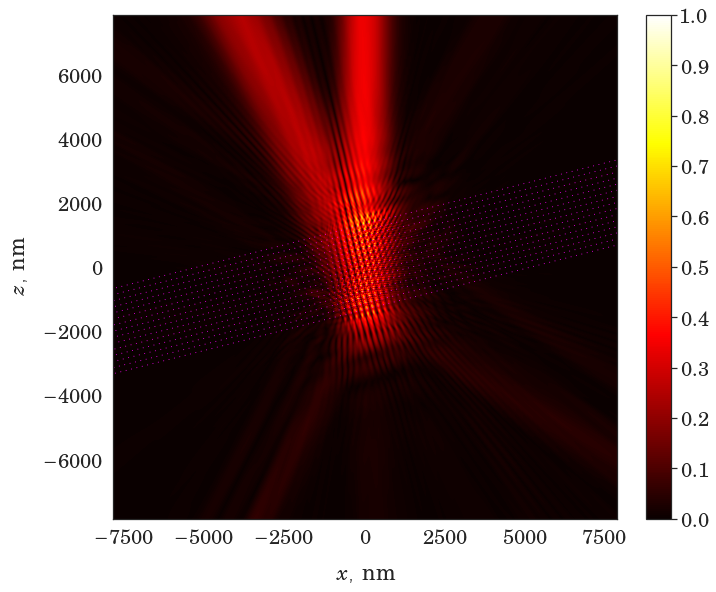

In [5]:
abc = MeshGenerator()
circles = abc.project_2d(edge=15, gap=83 * 2, radius=8.9, mult=12, angle=14.324)
circles = pd.DataFrame(circles, columns=['x', 'y', 'z', 'r'])

me = MSTM(matfiles['TE'][14.324])
f, a, bbea = me.plot_field(
        
        figsize=(10, 10), 
        #angles=[(24, 0.0), (-135, 0), (0, 0)],
        font_scale=2,
        reduce=0.9, 
        trim=0,
        target={'alpha' : 1, 'color' : 'magenta', 'linewidth' : 0.4},
        external_circles=circles
        
    )

# a.set_title(r'$|\overrightarrow{\mathbf{E_{s}}}|\:/\:|\overrightarrow{\mathbf{E_{i}}}|$', pad=20)

In [6]:
#f.savefig('../tex/components/img/celes/TE_14.324deg_check.pdf', bbox_inches='tight', bbox_extra_artists=bbea)